# Soil Fertility
Use elemetal soil analysis to determine the fertility of the soil.

**Input**
* N - ratio of Nitrogen (NH4+) content in soil
* P - ratio of Phosphorous (P) content in soil
* K - ratio of Potassium (K) content in soil
* ph - soil acidity (pH)
* ec - electrical conductivity
* oc - organic carbon
* S - sulfur (S)
* zn - Zinc (Zn)
* fe - Iron (Fe)
* cu - Copper (Cu)
* Mn - Manganese (Mn)
* B - Boron (B)

**Output**
* Class fertility (0 "Less Fertile", 1 "Fertile", 2 "Highly Fertile")


Connect colab to google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/AgriWise/ML/Soil Quality - Fertility'

/content/drive/.shortcut-targets-by-id/1nNpHsxhVob0qpN6DIX6h02v09VRuwzHw/AgriWise/ML/Soil Quality - Fertility


# Import Liberaries and Modules

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Naive Approch 
Before Data Modification

In [39]:
data = pd.read_csv('data1.csv')
data.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


Splitting data into inputs and targets

In [41]:
targetData = data['fertility']
inputData = data.drop('fertility', axis=1)

Splitting raw data into train and validation sets

In [42]:
naiveTrainInput, naiveValidationInput, naiveTrainTarget, naiveValidationTarget = train_test_split(inputData, targetData, test_size = 0.2, shuffle=True, random_state = 42)
print("Naive Train Data Shape: ", naiveTrainInput.shape)

Naive Train Data Shape:  (704, 12)


In [43]:
naiveTrainTarget = naiveTrainTarget.values.ravel()

In [45]:
naiveClf = ensemble.RandomForestClassifier()
naiveClf.fit(naiveTrainInput, naiveTrainTarget)

RandomForestClassifier()

In [46]:
naivePred = naiveClf.predict((naiveValidationInput))

In [60]:
naiveAcc = accuracy_score(naiveValidationTarget, naivePred)

print("Naive Accuracy : ", naiveAcc)

Naive Accuracy :  0.8806818181818182


# Get the modified data



In [ ]:
rawData = pd.read_csv('Soil Fertility Data.csv')
rawData.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


# Data Exploration

In [ ]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          1288 non-null   int64  
 1   P          1288 non-null   float64
 2   K          1288 non-null   int64  
 3   ph         1288 non-null   float64
 4   ec         1288 non-null   float64
 5   oc         1288 non-null   float64
 6   S          1288 non-null   float64
 7   zn         1288 non-null   float64
 8   fe         1288 non-null   float64
 9   cu         1288 non-null   float64
 10  Mn         1288 non-null   float64
 11  B          1288 non-null   float64
 12  fertility  1288 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 130.9 KB


No null values

In [ ]:
rawData.describe()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,269.061335,17.643478,497.135093,7.549130,0.535893,0.632174,7.122888,0.442811,4.119185,0.911281,8.601530,0.611957,1.035714
std,80.542499,25.303343,120.887088,0.507163,0.134156,0.720488,4.026723,1.568333,3.028314,0.448782,4.466209,0.560781,0.810938
min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,207.000000,7.200000,422.000000,7.340000,0.430000,0.390000,4.520000,0.280000,1.360000,0.600000,6.045000,0.290000,0.000000
50%,289.000000,9.200000,465.000000,7.500000,0.530000,0.620000,6.330000,0.360000,3.740000,0.890000,8.540000,0.420000,1.000000
75%,333.000000,13.800000,570.000000,7.700000,0.630000,0.832500,8.450000,0.480000,6.320000,1.250000,11.560000,0.650000,2.000000
max,383.000000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [ ]:
rawData['fertility'].value_counts()

2    447
1    440
0    401
Name: fertility, dtype: int64

- 0 describes low-fertility
- 1 describes medium-fertility
- 2 describes high-fertility

In [ ]:
rawDataCopy = rawData.copy()
rawDataCopy.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


Correlation is a statical technique to show the relation between variables and if they depend on each other.

In [ ]:
corr = rawDataCopy.corr()

<Axes: >

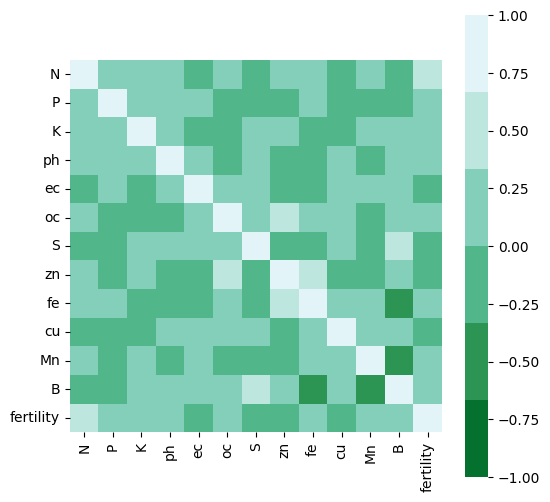

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.color_palette("BuGn_r"),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Divide data into X (features) and y (labels/targets).

In [ ]:
labels = rawDataCopy[['fertility']]
features = rawDataCopy.drop('fertility', axis=1)

In [ ]:
features.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82


In [ ]:
labels.head()

,fertility
0,0
1,0
2,0
3,0
4,0


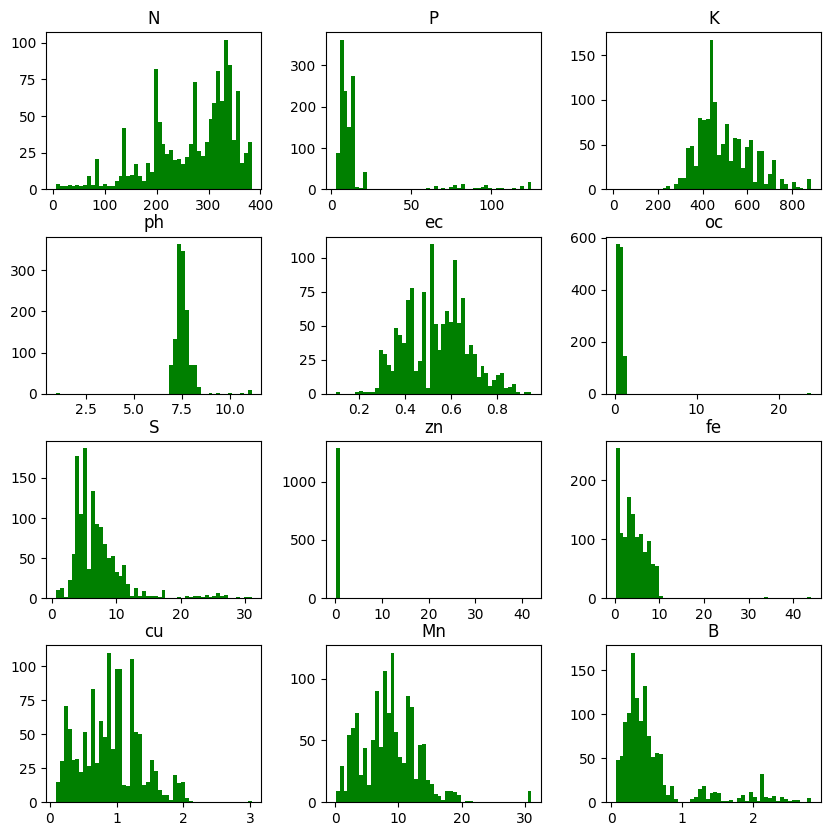

In [ ]:
features.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

# Prepare the Data for Machine Learning Algorithms

### Feature Scaling

We use Log Transform to convert skewed distibution to a normal distribution

In [118]:
transformedFeatures = features.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

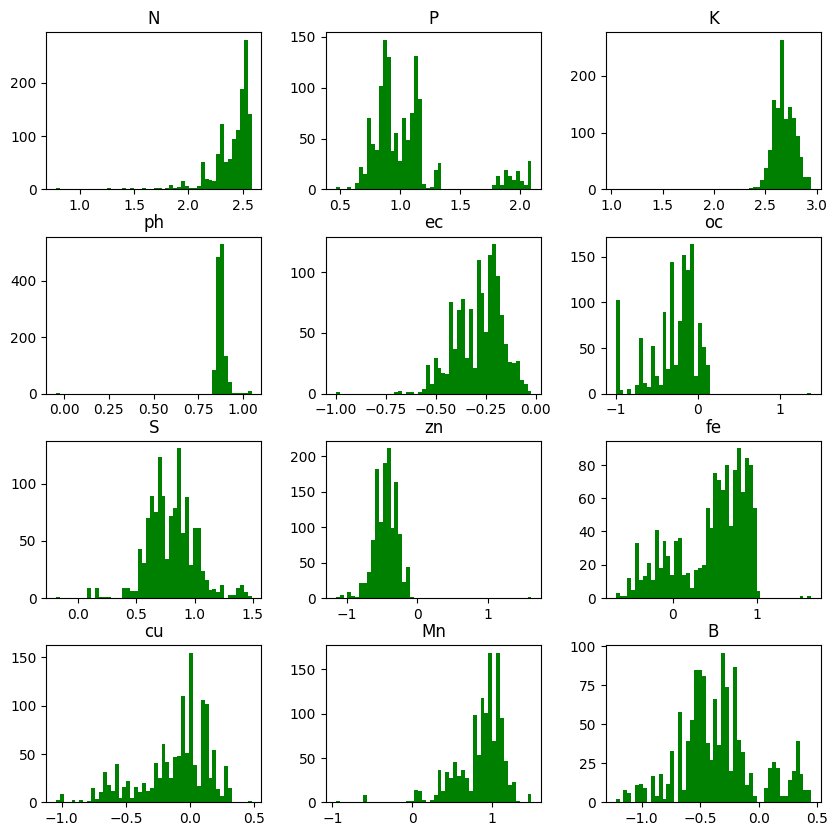

In [119]:
transformedFeatures.hist(bins=50, figsize=(10, 10), color='green', grid=False)
plt.show()

#Choose a Model

Splitting prepared data into train and validation sets

In [120]:
trainInput, validationInput, trainTarget, validationTarget = train_test_split(transformedFeatures, labels, test_size = 0.2, shuffle=True, random_state = 42)
print("Train Data Shape: ", trainInput.shape)

Train Data Shape:  (1030, 12)


In [121]:
trainTarget = trainTarget.values.ravel()

In [122]:
svcClf = SVC()
svcClf.fit(trainInput, trainTarget)

SVC()

In [123]:
forestClf = ensemble.RandomForestClassifier()
forestClf.fit(trainInput, trainTarget)

RandomForestClassifier()

In [124]:
nbClf = GaussianNB()
nbClf.fit(trainInput, trainTarget)

GaussianNB()

In [125]:
knnClf = KNeighborsClassifier()
knnClf.fit(trainInput, trainTarget)

KNeighborsClassifier()

In [126]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(trainInput, trainTarget)

DecisionTreeClassifier()

SVC  accuarcy is  0.6511627906976745
RandomForestClassifier  accuarcy is  0.9689922480620154
GaussianNB  accuarcy is  0.5736434108527132
KNeighborsClassifier  accuarcy is  0.810077519379845
DecisionTreeClassifier  accuarcy is  0.9302325581395349


<Axes: >

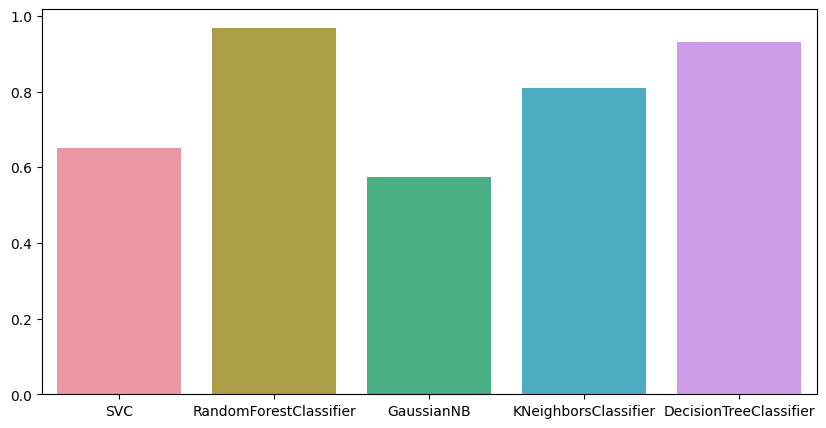

In [127]:
models = [svcClf, forestClf, nbClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict((validationInput))
    model_acc = accuracy_score(validationTarget, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.color_palette("crest")
sns.barplot(x = titles, y=accs)

### Pros & Cons
**SVC**
1. clear margin of separation between classes
2. more effective in high dimensional spaces
3. effective in cases where the number of dimensions is greater than the number of samples
4. memory efficient                                                                                                          
5. not suitable for large data sets                                                                                          

**Random Forest Classifier**
1. quite fast
2. able to deal with unbalanced and missing data
3. may over-fit data sets that are particularly noisy
4. data-hungry

**GaussianNB**
1. very fast 
2. better than other models with less training data if the assumption of independence of features holds
3. If you have categorical input variables, the Naive Bayes algorithm performs exceptionally well in comparison to numerical variables
4. effectively works in Multi-class predictions.

**KNeighborsClassifier**
1. robust to noisy data
2. effective if the training data is large

**DecisionTreeClassifier**
1. does not require normalization of data
2. does not require scaling of data as well
3. higher time to train the model

# RandomForest Model

In [128]:
forestClassifier = ensemble.RandomForestClassifier(random_state=42)

In [129]:
paramGrid = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6 ,7 ,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [130]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=forestClassifier, param_grid=paramGrid, cv= 5)
clf.fit(trainInput, trainTarget)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [131]:
randomForestModel = ensemble.RandomForestClassifier(criterion = 'gini',
 max_depth = 10,
 max_features = 'auto',
 n_estimators = 300, random_state=42)

In [132]:
randomForestModel.fit(trainInput, trainTarget)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=300,
                       random_state=42)

In [133]:
predictions = randomForestModel.predict(validationInput)

In [134]:
report = classification_report(validationTarget, predictions)
report

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96        86\n           1       0.97      0.95      0.96        87\n           2       1.00      1.00      1.00        85\n\n    accuracy                           0.97       258\n   macro avg       0.97      0.97      0.97       258\nweighted avg       0.97      0.97      0.97       258\n'

In [135]:
modelAcc = accuracy_score(validationTarget, predictions)
modelAcc

0.9728682170542635

# Naive approuch accuracy VS our model accuracy

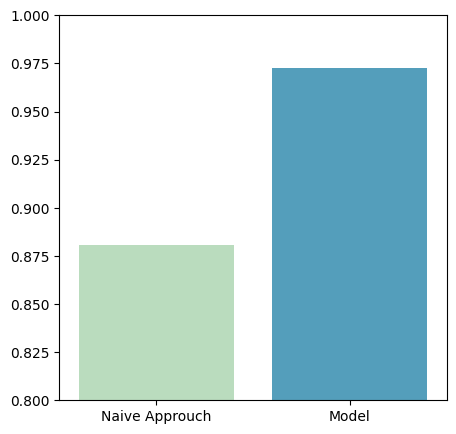

In [136]:
fig = plt.figure(figsize=(5, 5))
plt.ylim(.80, 1)
sns.set_palette("GnBu", 2)
sns.barplot(x = ['Naive Approuch', 'Model'], y=[naiveAcc, modelAcc])
plt.show()

# Save the model

In [137]:
import pickle

with open('random_forest_pkl.pkl', 'wb') as file:
  pickle.dump(model, file)

# Load the model

In [141]:
with open('random_forest_pkl.pkl', 'rb') as file:
  model = pickle.load(file)

In [139]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 300}